## Proyecto TSFC: Oscilaciones en Sistemas Biológicos

## Comportamiento de Testosterona

### Hernández de la Vega Alejandro
### Rodríguez Rosenblueth César Daniel
### Santiago Santos Eva Yazmín 

Para una primera aproximación se utiliza el siguiente modelo:

$$ \frac{dR}{dt} = f(T)-b_{1}R$$
$$ \frac{dL}{dt} = g_{1}R-b_{2}L $$
$$ \frac{dT}{dt} = g_{2}L-b_{3}T $$

donde $b_{1}$, $b_{2}$, $b_{3}$, $g_{1}$, $g_{2}$ son parámetros positivos.


Alrededor del punto de equilibrio se tiene:

$$ \frac{dx}{dt} = f'(T_{0})z-b_{1}x$$
$$ \frac{dy}{dt} = g_{1}x-b_{2}y $$
$$ \frac{dz}{dt} = g_{2}y(t-\tau)-b_{3}T $$

In [1]:
using PyPlot
using TaylorSeries

In [2]:
function h_find(x::Array,p::Int)
    h1 = (1/10)*(eps(1.0)/abs(x[p+1]))^(1/p)
    h2 = (1/10)*(eps(1.0)/abs(x[p]))^(1/(p-1))
    if h1 - h2 >= 0
        return h2
    else
        return h1
    end
end

h_find (generic function with 1 method)

In [3]:
evaluate(Taylor1([5,1],10),2)

7

In [4]:
Taylor1(2,2)

 2 + 𝒪(t³)

In [5]:
exp(ans)

 7.38905609893065 + 𝒪(t³)

In [11]:
function try1(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    A=2
    K=1
    m=12
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

try1 (generic function with 1 method)

In [12]:
try1(1.0,2.0,3.0,5,0.0,10.0)

([0.0,9.85297e-6,1.9706e-5,2.9559e-5,3.94121e-5,4.92652e-5,5.91184e-5,6.89715e-5,7.88247e-5,8.8678e-5  …  9.99994,9.99995,9.99996,9.99996,9.99997,9.99998,9.99998,9.99999,10.0,10.0],[1.0,0.999987,0.999975,0.999962,0.999949,0.999936,0.999924,0.999911,0.999898,0.999886  …  0.339305,0.33931,0.339314,0.339319,0.339324,0.339328,0.339333,0.339337,0.339342,0.339346],[3.0,3.00007,3.00014,3.00021,3.00028,3.00035,3.00042,3.00049,3.00056,3.00063  …  1.81047,1.81049,1.8105,1.81051,1.81052,1.81053,1.81054,1.81055,1.81056,1.81058],[2.0,1.99999,1.99999,1.99998,1.99997,1.99997,1.99996,1.99995,1.99995,1.99994  …  0.983283,0.983282,0.983281,0.983281,0.98328,0.983279,0.983279,0.983278,0.983277,0.983277])

In [13]:
t=try1(1.0,2.0,3.0,5,0.0,10.0)[1];
R=try1(1.0,2.0,3.0,5,0.0,10.0)[2];
L=try1(1.0,2.0,3.0,5,0.0,10.0)[3];
T=try1(1.0,2.0,3.0,5,0.0,10.0)[4];

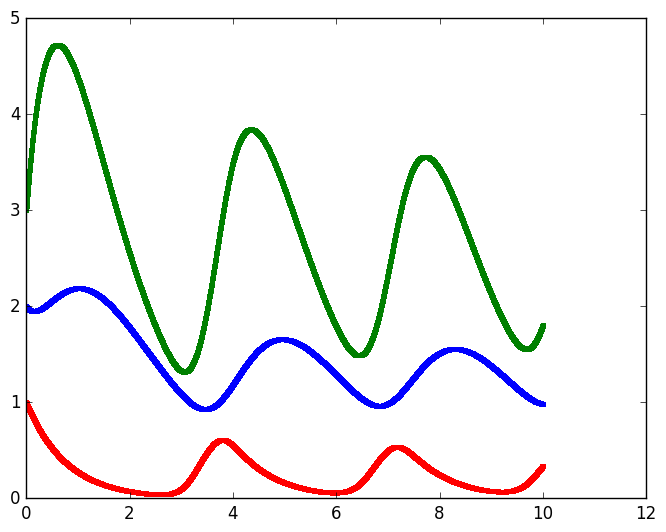

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3318ecf98>

In [16]:
plot(t,R,"r.")
plot(t,T, "b.")
plot(t,L, "g.")

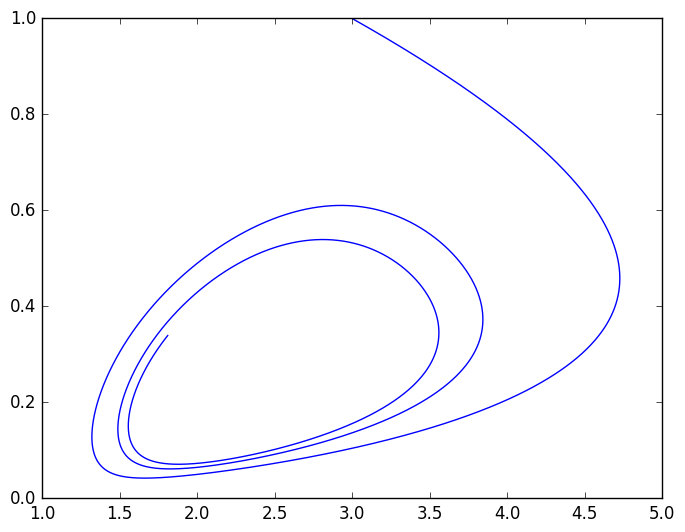

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x331871e80>

In [15]:
plot(L,R)

Referencias:

[1] Murray, J. D. 1989. Mathematical Biology. Volume 19. 
